# Capstone Project

In [100]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: termcolor in c:\users\vasavi\anaconda3\lib\site-packages (2.3.0)



In [101]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [152]:
#Importing the libraries
import pandas as pd      
import numpy as np       
import matplotlib.pyplot as plt    
import matplotlib.dates as mdates   
import seaborn as sns  
import sklearn           
import statsmodels.api as sm      
import scipy.stats as stats       
import random
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from termcolor import colored
import pylab
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [103]:
# Set the file path and name


train_df=pd.read_csv(r"C:\Users\vasavi\Downloads\bike_train.csv")

test_df=pd.read_csv(r"C:\Users\vasavi\Downloads\bike_test.csv")


# Copy of datasets
train = train_df
test = test_df


In [104]:
train

,unique,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,3,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,4,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,5,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,10882,19-12-2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,10883,19-12-2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,10884,19-12-2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,10885,19-12-2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [105]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


Predefined functions for the easy understanding

#### Function to print main info about the dataset in one line

In [106]:

def ds_info(df):
    print(colored('SIZE' , 'blue', attrs=['bold', 'dark']))
    print(df.size)
    print(colored('\nSHAPE' , 'blue', attrs=['bold', 'dark']))
    print(df.shape)
    print(colored('\nINFO' , 'blue', attrs=['bold', 'dark']))
    print(df.info())
    print(colored('\nNULL VALUES' , 'blue', attrs=['bold', 'dark']))
    print(df.isnull().sum())
    print(colored('\nHEAD' , 'blue', attrs=['bold', 'dark']))
    print(df.head())
    print(colored('\nTAIL' , 'blue', attrs=['bold', 'dark']))
    print(df.tail())
    print(colored('\nDESCRIBE - Numerical' , 'blue', attrs=['bold', 'dark']))
    print(df.describe())
    print(colored('\nDESCRIBE - Categorical' , 'blue', attrs=['bold', 'dark']))
    print(df.describe(include='object'))
    
    print(colored('\nUNIQUE ENTRIES IN EACH NUMERICAL COLUMN' , 'blue', attrs=['bold', 'dark']))
    # Get number of unique entries in each column with numerical data
    num_cols = [col for col in df.columns if df[col].dtype != "object"]
    num_nunique = list(map(lambda col: df[col].nunique(), num_cols))    
    dn = dict(zip(num_cols, num_nunique))
    # Print number of unique entries by column, in ascending order
    print(sorted(dn.items(), key=lambda x: x[1]))
    
    print(colored('\nUNIQUE ENTRIES IN EACH CATEGORICAL COLUMN' , 'blue', attrs=['bold', 'dark']))
    # Get number of unique entries in each column with categorical data
    object_cols = [col for col in df.columns if df[col].dtype == "object"]
    object_nunique = list(map(lambda col: df[col].nunique(), object_cols))
    dc = dict(zip(object_cols, object_nunique))
    # Print number of unique entries by column, in ascending order
    print(sorted(dc.items(), key=lambda x: x[1]))


In [107]:
ds_info(train)

SIZE
141518

SHAPE
(10886, 13)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unique      10886 non-null  int64  
 1   datetime    10886 non-null  object 
 2   season      10886 non-null  int64  
 3   holiday     10886 non-null  int64  
 4   workingday  10886 non-null  int64  
 5   weather     10886 non-null  int64  
 6   temp        10886 non-null  float64
 7   atemp       10886 non-null  float64
 8   humidity    10886 non-null  int64  
 9   windspeed   10886 non-null  float64
 10  casual      10886 non-null  int64  
 11  registered  10886 non-null  int64  
 12  count       10886 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.1+ MB
None

NULL VALUES
unique        0
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0

In [108]:
ds_info(test)

SIZE
58437

SHAPE
(6493, 9)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB
None

NULL VALUES
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

HEAD
              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  201

We need the datetime column to be divided into year,month,date and time to predict 

In [109]:
   
# This Function is to parse date 
def parse_datetime(data):
    #convert date.datetime to type datetime 
    data.datetime = pd.to_datetime(data.datetime)
    # split in columns
    data['year'] = data['datetime'].dt.year
    data['month'] = data['datetime'].dt.month
    data['day'] = data['datetime'].dt.day
    data['hour'] = data['datetime'].dt.hour
    data['weekday'] = data['datetime'].dt.weekday

In [110]:
# Convert ds to type datetime and split in columns
parse_datetime(train)
parse_datetime(test)

### Data Information

#### Features

datetime - hourly date + timestamp

season - season of the year (1 = spring, 2 = summer, 3 = fall, 4 = winter)

holiday - whether the day is considered a holiday (1: holiday, 0: not a holiday)

workingday - whether the day is neither a weekend nor holiday (1: working day, 0: not a working day)

weather:

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

**Feature Engineering**
 Some features such as season, holiday, weather and humidity are type int, but they are actually categorical data.So mapped those according to description in the project

In [111]:
# Train
train["season"] = train.season.map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter" })
train["weather"] = train.weather.map({1:"Clear",\
                                        2:"Cloudy", \
                                        3:"Light Snow/Rain", \
                                        4:"Heavy Rain/Snow"})
# Test
test["season"] = test.season.map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter" })
test["weather"] = test.weather.map({1:"Clear",\
                                        2:"Cloudy", \
                                        3:"Light Snow/Rain", \
                                        4:"Heavy Rain/Snow"})

In [112]:
# Train
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    train[var] = train[var].astype("category")

In [113]:
# Test
for var in categoryVariableList:
    test[var] = test[var].astype("category")

The column datetime is not neccessary anymore so I dropped.

In [114]:
# Train
x_date_test = test['datetime'].values #to be used to submit the model
train = train.drop(['datetime'], axis=1)
# Test
test = test.drop(['datetime'], axis=1)

In [115]:
print(train.isnull().sum())

unique        0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
weekday       0
dtype: int64


In [116]:
print(test.isnull().sum())

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
year          0
month         0
day           0
hour          0
weekday       0
dtype: int64


In [117]:
#### Analysing the data

[Text(0.5, 0, 'Weather'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Count by Weather')]

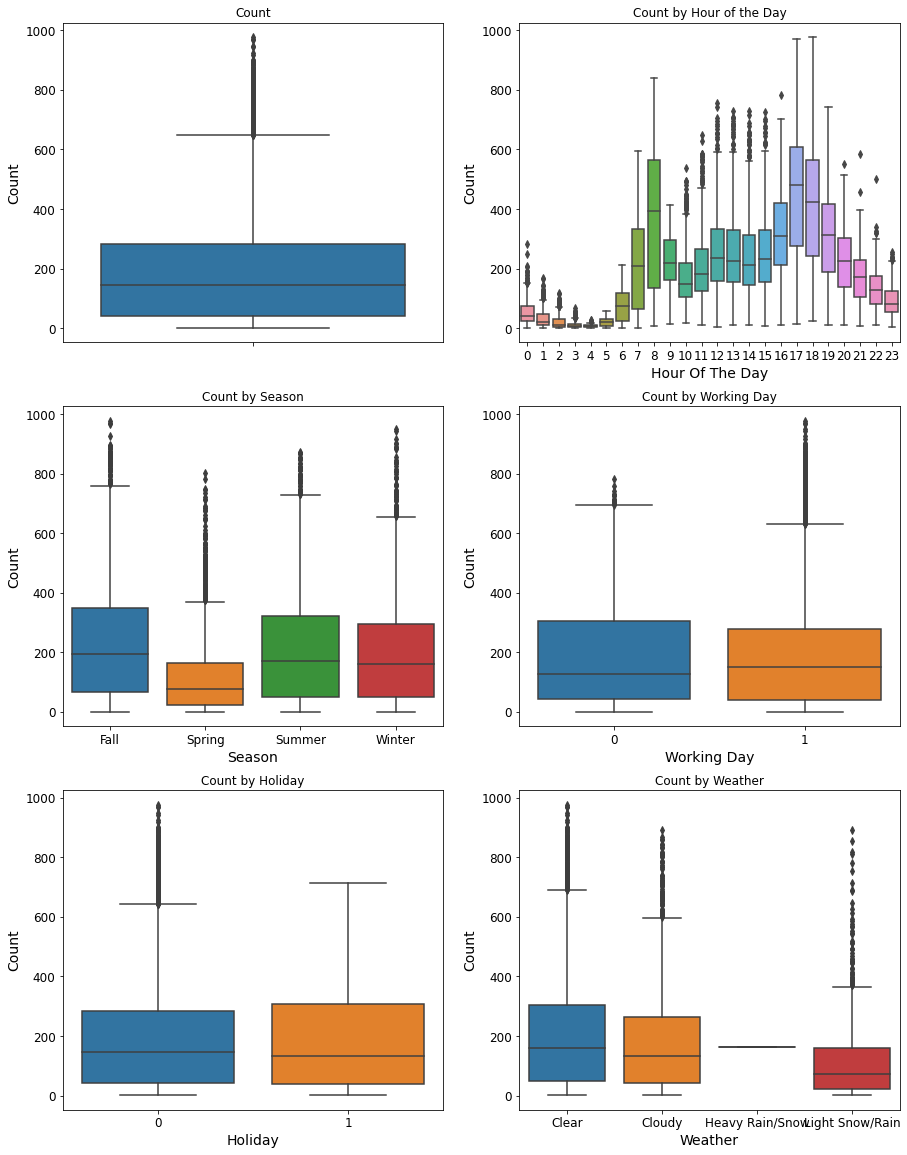

In [118]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 20)
sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=train,y="count",x="holiday",orient="v",ax=axes[2][0])
sns.boxplot(data=train,y="count",x="weather",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Count")
axes[0][1].set(xlabel='Hour Of The Day', ylabel='Count',title="Count by Hour of the Day")
axes[1][0].set(xlabel='Season', ylabel='Count',title="Count by Season")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Count by Working Day")
axes[2][0].set(xlabel='Holiday', ylabel='Count',title="Count by Holiday")
axes[2][1].set(xlabel='Weather', ylabel='Count',title="Count by Weather")
#axes[2][1].set_xticklabels([])


>Description of columns and its features:
>datetime - hourly date + timestamp
season - season of the year (1 = spring, 2 = summer, 3 = fall, 4 = winter)
holiday - whether the day is considered a holiday (1: holiday, 0: not a holiday)
workingday - whether the day is neither a weekend nor holiday (1: working day, 0: not a working day)
weather:
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

>Analysis:
>The comparison between seasons show spring is the one with lower number of bike rent.
The boxplot with meaninful information is the Hour of the day, because it shows the busiest hours are 7AM - 8AM and 5PM - 6PM, which means the users mainly rent the bikes to ride to work/school and to return back home at the end of the day.
Based on boxplots 4 and 5 (Working Day and Holiday), we see most outliers are in working days. The result make sense when looking to Holiday, since all outliers are for non holidays days.
The last boxploy demonstrates the obvious common sense that most users rent bikes when the weather is Clear and Cloudy (1 and 2), and almost no users when is heavy raining or snowing (3).

>Removing Outliers
>It will be used the Three-sigma rule to remove the outliers, also known as the "68-95-99.7 rule". Tree-sigma is a statistical principle that states that for a normal distribution of data, approximately 68% of the data will fall within one standard deviation of the mean, about 95% will fall within two standard deviations, and about 99.7% will fall within three standard deviations.
>In practice, this means that if we have a data point that falls outside of three standard deviations from the mean, it is considered an outlier and may be removed from the dataset. This approach assumes that the data follows a normal distribution and that outliers are rare events that are unlikely to occur in the future.

In [119]:
    
# This Function is to detect and print outliers 
def detect_outliers(data):
    # mean, standard deviation and 3-sigma of the data
    mean = np.mean(data)
    std = np.std(data)
    threesigma = 3 * std
    
    # printing upper, lower boundary and boxplot
    sns.boxplot(data, orient="v")
    plt.show()
    lower, upper = mean-3*std, mean+3*std
    print(f"Upper and lower boundary is: {lower}/{upper}")
    
    # identifing outliers and returning the outliers
    outliers = [x for x in data if np.abs(x - mean) > threesigma]
    print(f"There are {len(outliers)} outliers based on three-sigma rule")


C:\Users\vasavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vasavi\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


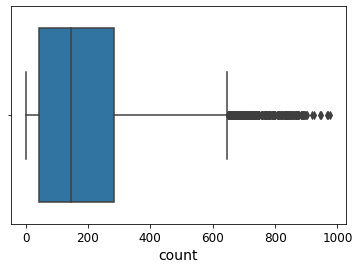

Upper and lower boundary is: -351.8342688102485/734.982532635345
There are 147 outliers based on three-sigma rule


In [120]:

#copying of train data to compare
train_with_outliers = train
# Detecting the Outliers
detect_outliers(train['count'])

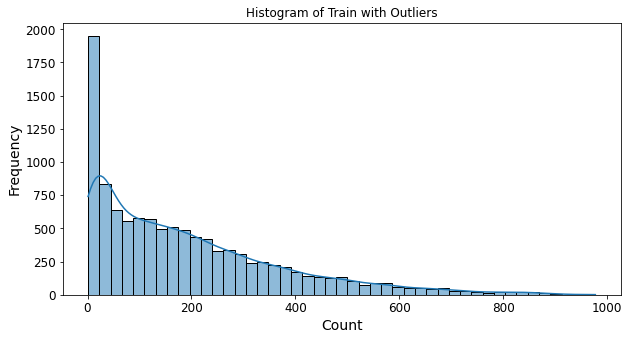

In [121]:
# Ploting distribuition with outliers
fig,axes = plt.subplots()
fig.set_size_inches(10, 5)
sns.histplot(train_with_outliers["count"], kde=True)

# Setting plot title and labels
plt.title('Histogram of Train with Outliers')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

In [122]:
# This Function is to delete the outliers 
def delete_outliers(data, df):
    # detecting and dropping outliers 
    original_shape = df.shape
    mean = np.mean(data)
    std = np.std(data)
    outliers = np.abs(data-mean) > (3*std)
    outliers_num = len(train[outliers])
    df.drop(index=data[outliers].index, inplace=True)
    
    # print what was deleted
    print("Number of outliers deleted:", outliers_num)
    print ("Shape of dataframe with Ouliers: ",original_shape)
    print ("Shape of Dataframe After Deleting the Ouliers: ",df.shape)


In [123]:
# Dropping the outliers from train dataset
delete_outliers(train['count'], train)

Number of outliers deleted: 147
Shape of dataframe with Ouliers:  (10886, 17)
Shape of Dataframe After Deleting the Ouliers:  (10739, 17)


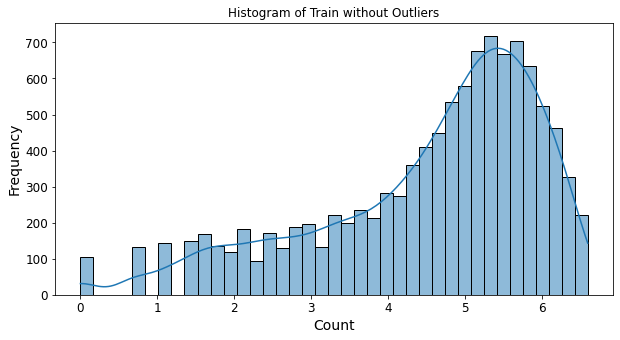

In [124]:
# Ploting distribuition of train without outliers
fig,axes = plt.subplots()
fig.set_size_inches(10, 5)
sns.histplot(np.log(train["count"]), kde=True)

# Setting plot title and labels
plt.title('Histogram of Train without Outliers')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

Analisys of emtpty values and 0


Windspeed demonstrated to have 0 values, which could represent just the lack of wind or values to be fullfilled. So it bacame necessary evaluate the number of zeros present in the sample and its impact. In train datatset Winspeed has 1297 zeros out 9442, which is 14% of the sample, and in test dataset this number is 15%. This hight number of zeros, presuming they are the absense of wind, could affect negatively our model. Before join the datasets train and test, Windspeed will be predicted and fullfiled using Random Forest model.

In [125]:
train['windspeed'].describe()

count    10739.000000
mean        12.787706
std          8.171075
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [126]:
count_zero = (train['windspeed'] == 0).sum()
none_zero = (train['windspeed'] != 0).sum()
print("Count of 0 in Windspeed variable:", count_zero)
print("Count of non zero in Windspeed variable:", none_zero)

Count of 0 in Windspeed variable: 1297
Count of non zero in Windspeed variable: 9442


In [127]:
count_zero = (test['windspeed'] == 0).sum()
none_zero = (test['windspeed'] != 0).sum()
print("Count of 0 in Windspeed variable:", count_zero)
print("Count of non zero in Windspeed variable:", none_zero)

Count of 0 in Windspeed variable: 867
Count of non zero in Windspeed variable: 5626


In [128]:
#This Function is to plot the Correlation Heatmap
def correlation_heatmap(corr):
    mask = np.array(corr)
    mask[np.tril_indices_from(mask)] = False
    
    # plotting the correlation
    fig,ax= plt.subplots()
    fig.set_size_inches(10,10)
    sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)

In [129]:
corr_variables = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()

In [130]:
corr_variables1 = train.corr()

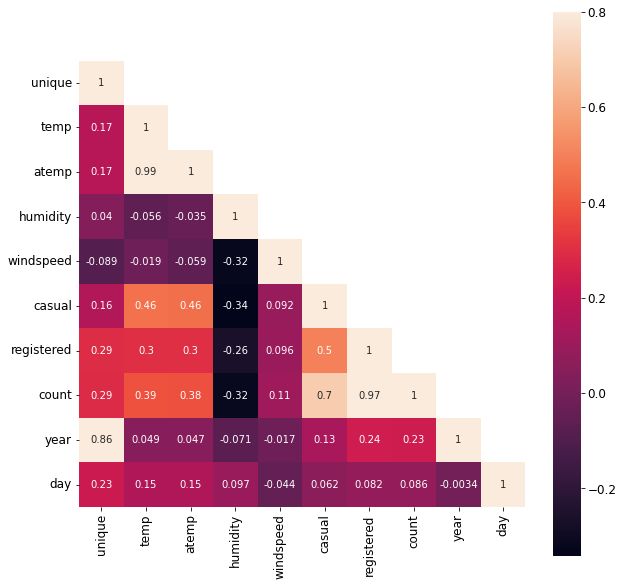

In [131]:
correlation_heatmap(corr_variables1)

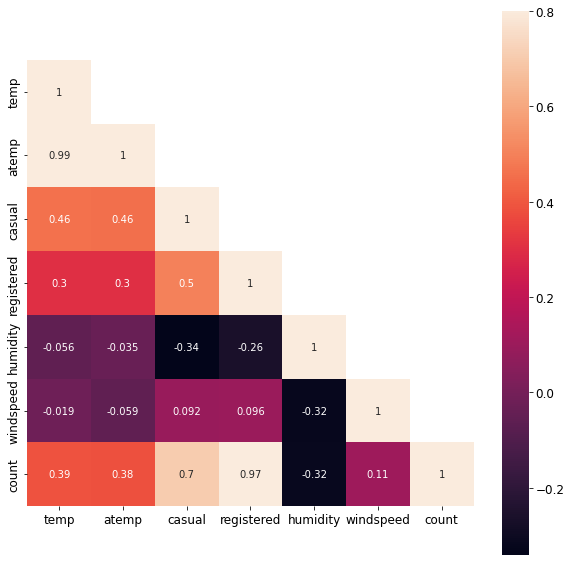

In [132]:
correlation_heatmap(corr_variables)

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Casual Count'),
 Text(0.5, 1.0, 'Box Plot On Casual Count Across Hour Of The Day')]

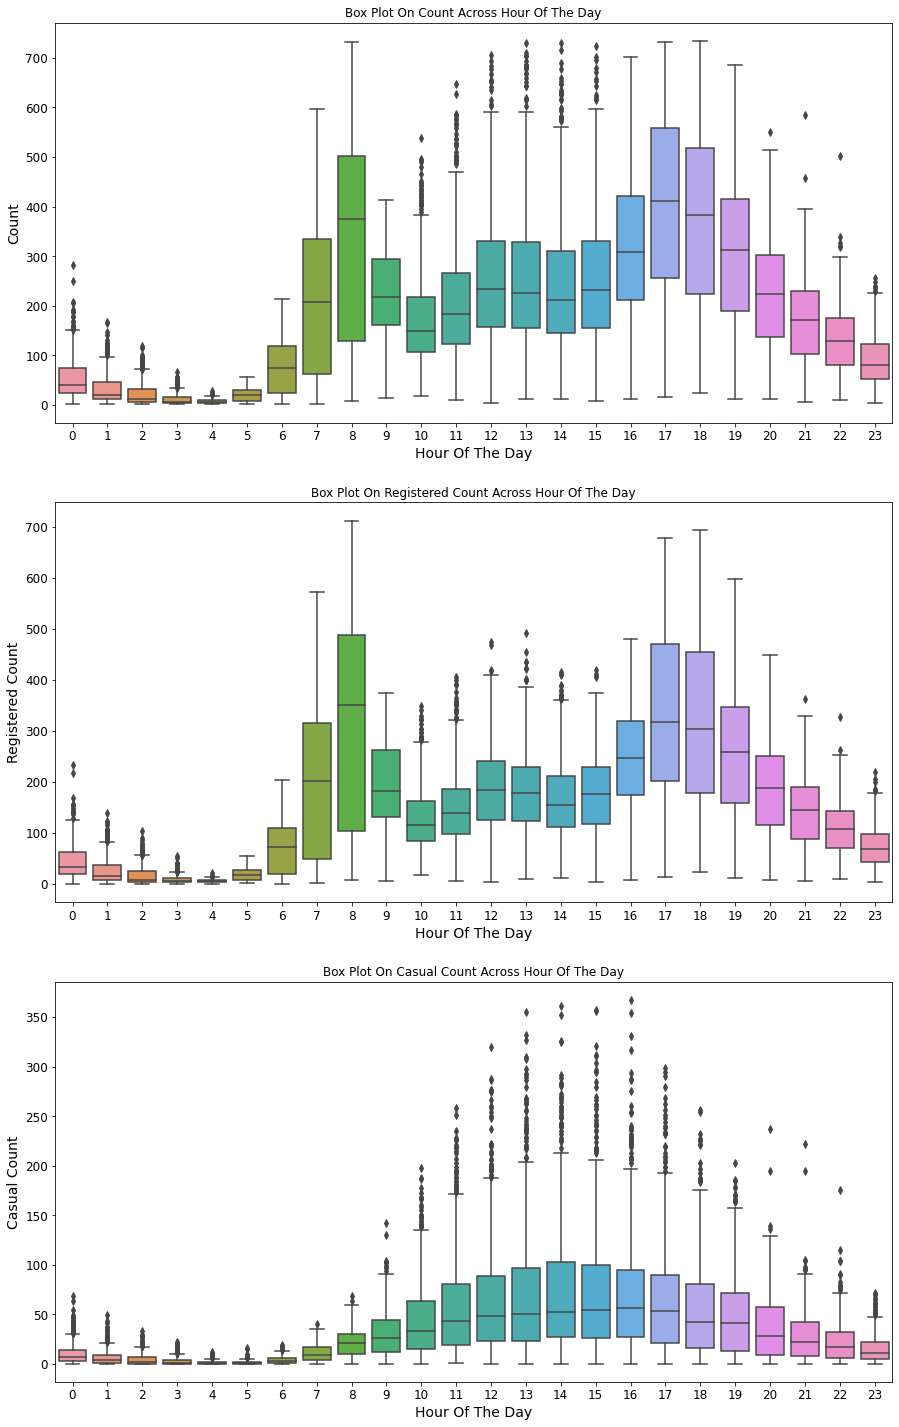

In [133]:
# boxplot of Count, Registered and Casual users by hour
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15, 25)

sns.boxplot(data=train,y="count",x="hour",orient="v", ax=axes[0])
sns.boxplot(data=train,y="registered",x="hour",orient="v", ax=axes[1])
sns.boxplot(data=train,y="casual",x="hour",orient="v",ax=axes[2])

axes[0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1].set(xlabel='Hour Of The Day', ylabel='Registered Count',title="Box Plot On Registered Count Across Hour Of The Day")
axes[2].set(xlabel='Hour Of The Day', ylabel='Casual Count',title="Box Plot On Casual Count Across Hour Of The Day")

Text(0.5, 0.98, 'Weather count across Seasons')

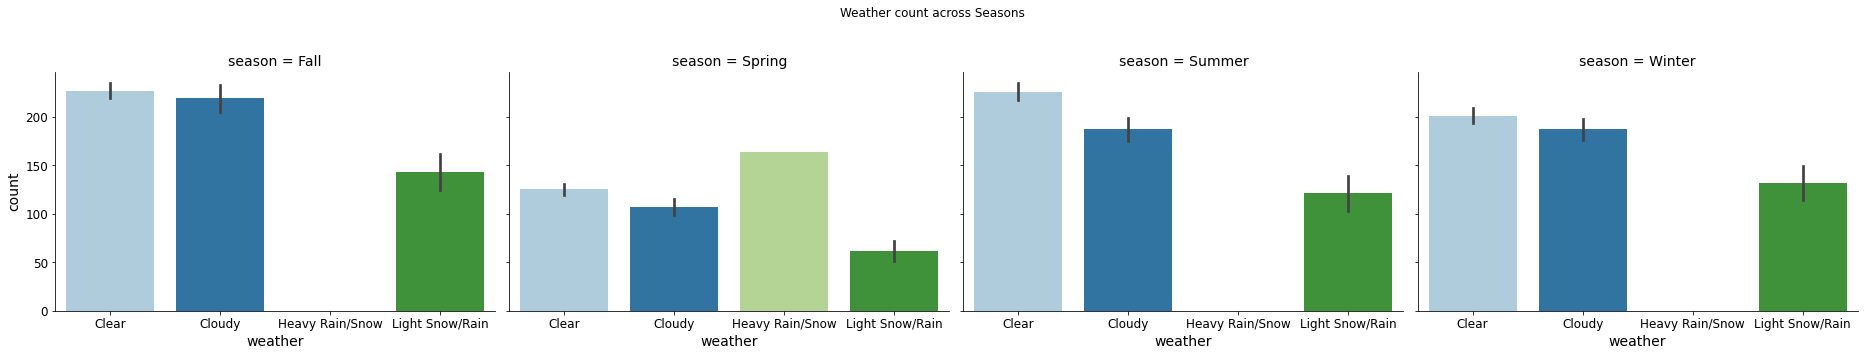

In [134]:
# weather count across seasons
g = sns.catplot(x='weather', y='count', col='season', kind="bar", palette="Paired", data=train, aspect=1.3)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Weather count across Seasons")


[Text(0.5, 0, 'Hour of the Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Count of Registered vs Casual by Hour of the Day')]

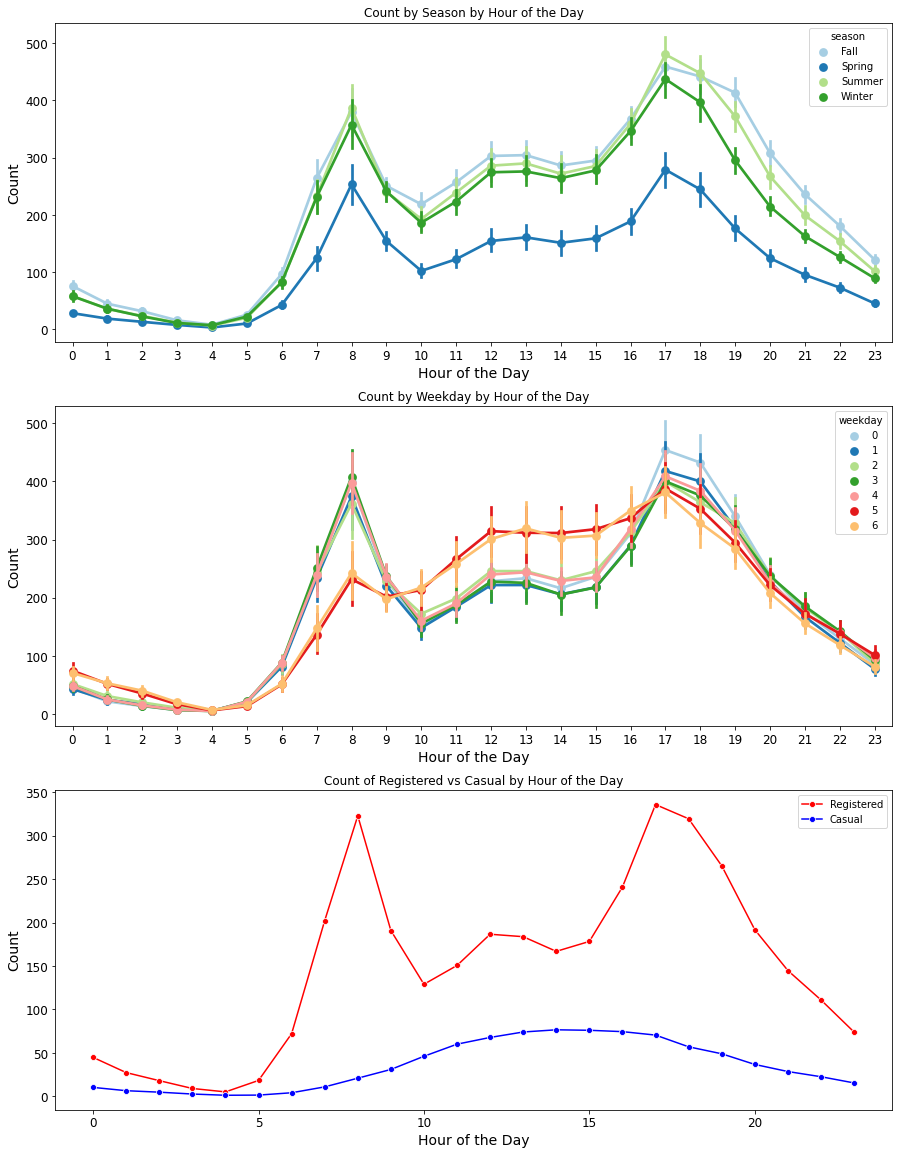

In [135]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(15,20)
sns.pointplot(x='hour',y='count',hue='season',join=True, data=train, palette="Paired", ax=ax1)
sns.pointplot(x='hour',y='count',hue='weekday',join=True, data=train, palette="Paired", ax=ax2)
sns.lineplot(x='hour', y='registered', data=train, color='red',label='Registered', marker='o', ax=ax3, ci=None)
sns.lineplot(x='hour', y='casual', data=train, color='blue', label='Casual', marker='o', ax=ax3, ci=None)
ax3.set_ylabel('Count')

ax1.set(xlabel='Hour of the Day', ylabel='Count',title="Count by Season by Hour of the Day")
ax2.set(xlabel='Hour of the Day', ylabel='Count',title="Count by Weekday by Hour of the Day")
ax3.set(xlabel='Hour of the Day', ylabel='Count',title="Count of Registered vs Casual by Hour of the Day")

In [136]:
train.columns

Index(['unique', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [137]:
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [138]:
train["season"] = train["season"].map({"Spring": 1, "Summer": 2, "Fall": 3, "Winter": 4})
train["weather"] = train["weather"].map({"Clear":1, "Cloudy":2, "Light Snow/Rain":3, "Heavy Rain/Snow":4})

In [139]:
test["season"] = test["season"].map({"Spring": 1, "Summer": 2, "Fall": 3, "Winter": 4})
test["weather"] = test["weather"].map({"Clear":1, "Cloudy":2, "Light Snow/Rain":3, "Heavy Rain/Snow":4})

In [140]:
# Drop from train
drop_columns = ['unique','count', 'casual', 'registered', 'day']
X_train = train.drop(drop_columns, axis=1).values
X_train_full = X_train # to be used in the final model

In [141]:
# Drop from test
X_test = test.drop('day', axis=1).values
X_test_full = X_test # to be used in the final model

In [142]:
print(X_train_full.shape)

(10739, 12)


In [143]:
print(X_test_full.shape)

(6493, 12)


In [144]:
# Print the categorical columns
print(train.dtypes)

unique           int64
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
year             int64
month         category
day              int64
hour          category
weekday       category
dtype: object


In [145]:
# Print the categorical columns
print(test.dtypes)

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
year             int64
month         category
day              int64
hour          category
weekday       category
dtype: object


In [146]:
y_casual = train['casual'].apply(lambda x: np.log1p(x)).values
y_registered = train['registered'].apply(lambda x: np.log1p(x)).values
y = train['count'].apply(lambda x: np.log1p(x)).values

In [147]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.2, random_state=42)

In [153]:
# Initialize the Linear model
l_model = LinearRegression()

# Train the model
#log_yl_train = np.log1p(y_train)
#log_yl_test = np.log1p(y_test)
#l_model.fit(X=X_train, y=log_yl_train)
l_model.fit(X=X_train, y=y_train)

# Make predictions on the set
y_test_pred = l_model.predict(X=X_test)

# Get score
#score_l = rmsle(log_yl_test, y_test_pred)
score_l = rmsle(y_test, y_test_pred)
print("Linear Model - Root Mean Squared Logarithmic Error:", score_l)

NameError: name 'rmsle' is not defined

In [149]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Get score
score_rf = rmsle(y_test, y_pred)
print("Random Forest - Root Mean Squared Logarithmic Error:", score_rf)

NameError: name 'rmsle' is not defined

In [ ]:
# Initialize the Gradient Boost Tree model
gbt_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbt_model.predict(X_test)

# Get score
score_gbt = rmsle(y_test, y_pred)
print("Gradient Boost Tree - Root Mean Squared Logarithmic Error:", score_gbt)

In [ ]:
# Initialize the Extreme Gradient Boost model - XG Boost
xgb_model = xgb.XGBRegressor(n_estimators = 100, max_depth = 5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Get score
score_xgb = rmsle(y_test, y_pred)
print("XG Boost - Root Mean Squared Logarithmic Error:", score_xgb)

In [ ]:
print("Linear Model:", score_l)
print("Random Forest:", score_rf)
print("Gradient Boost Tree:", score_gbt)
print("XG Boost:", score_xgb)

Models using Registered and Casual variables:
Since count is the result of registered and casual users, and the pattern is clearly different between these two groups, the results can be improved if we predict them one by one and then sum them up.

In [ ]:
# Initialize the XG Boost for Casual users
xgb1_model = xgb.XGBRegressor(n_estimators = 100, max_depth = 5, random_state=42)
# Train the model for Casual
xgb1_model.fit(X_train_full, y_casual)

# Initialize the XG Boost for Registered users
xgb2_model = xgb.XGBRegressor(n_estimators = 100, max_depth = 5, random_state=42)
# Train the model for Registered
xgb2_model.fit(X_train_full, y_registered)

# Initialize the XG Boost for Count users
xgb3_model = xgb.XGBRegressor(n_estimators = 100, max_depth = 5, random_state=42)
# Train the model for Casual
xgb3_model.fit(X_train_full, y)

# Print the accuracy
print ("Score for prectiction of casual: ", xgb1_model.score(X_train_full, y_casual))
print ("Score for prectiction of registered: ", xgb2_model.score(X_train_full, y_registered))
print ("Score for prectiction of count: ", xgb3_model.score(X_train_full, y))

In [ ]:
prediction = []

# Casual
pred1 = xgb1_model.predict(X_test_full)  
pred1 = np.expm1(pred1)

In [ ]:
# Registered
pred2 = xgb2_model.predict(X_test_full) # Registered 
pred2 = np.expm1(pred2)
prediction = pred1 + pred2

In [ ]:
submit = pd.DataFrame({'datetime':x_date_test,'count':prediction})

In [ ]:
submit.to_csv(r"C:\Users\vasavi\Downloads\1sttrail.csv",index=False)


#r"C:\Users\vasavi\Downloads\1sttrail.csv